In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from subprocess import check_output

In [111]:
print(check_output(["ls", "./input"]).decode("utf8"))

Iris.csv



In [112]:
iris_data = pd.read_csv("./input/Iris.csv")

In [113]:
iris_data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [114]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [115]:
# skipping dropping id column for now
print(iris_data.columns)
iris_data.drop('Id', axis = 1,inplace = True)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [117]:
iris_data.shape

(150, 5)

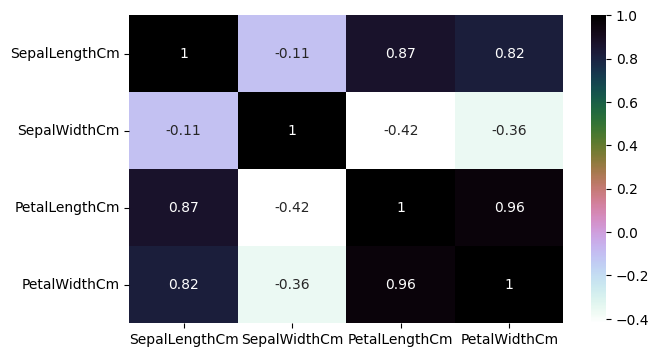

In [118]:
if 'Species' in iris_data.columns:
    iris_data.drop('Species', axis=1, inplace=True)
# print("Columns after drop:", iris_data.columns)
# Plot the correlation heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(iris_data.corr(), annot=True, cmap='cubehelix_r')
plt.show()

Splitting The Data into Training And Testing Dataset

In [119]:
train_data, test_data = train_test_split(iris_data, test_size=0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train_data.shape)
print(test_data.shape)

(105, 4)
(45, 4)


In [120]:
# training data features
train_features = train_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# output of our training data
train_labels = train_data.Species
# taking test data features
test_features = test_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# output value of test data
test_labels = test_data.Species

AttributeError: 'DataFrame' object has no attribute 'Species'

In [ ]:
train_features.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
64,5.6,2.9,3.6,1.3
133,6.3,2.8,5.1,1.5


In [ ]:
test_features.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
45,4.8,3.0,1.4,0.3
10,5.4,3.7,1.5,0.2


In [ ]:
# output of training data
train_labels.head()

64     Iris-versicolor
133     Iris-virginica
109     Iris-virginica
72     Iris-versicolor
43         Iris-setosa
Name: Species, dtype: object

Support Vector Machine (SVM)

In [ ]:
# select the alogorithm
svm_classifier = svm.SVC()

# train the algorith with the training data and the training output
svm_classifier.fit(train_features, train_labels)

# pass the testing data to the trained algorithm
prediction = svm_classifier.predict(test_features)

# check the accuracy of the algorithm
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction,test_labels))

The accuracy of the SVM is: 0.9777777777777777


Logistic Regression

In [ ]:
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(train_features, train_labels)
prediction = logistic_regression_classifier.predict(test_features)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, test_labels))

The accuracy of the Logistic Regression is 0.9777777777777777


Decision Tree

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(train_features, train_labels)
prediction = decision_tree_classifier.predict(test_features)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, test_labels))

The accuracy of the Decision Tree is 1.0


K-Nearest Neighbours

In [ ]:
# examines 3 neighbours for putting the new data into a class
K_neighbors_classifier = KNeighborsClassifier(n_neighbors=3)
K_neighbors_classifier.fit(train_features, train_labels)
prediction = K_neighbors_classifier.predict(test_features)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction, test_labels))

The accuracy of the KNN is 0.9777777777777777


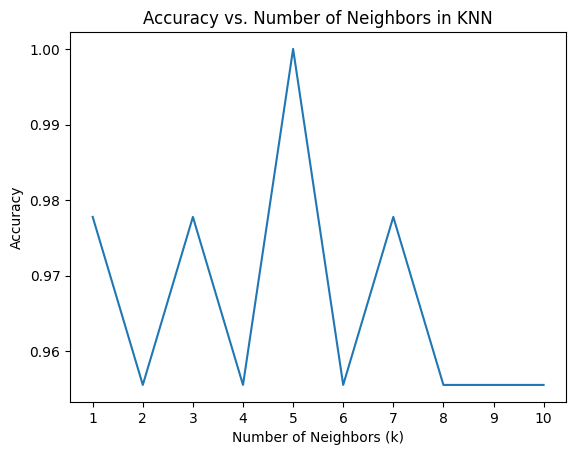

In [ ]:
# Check the accuracy for various values of n for K-Nearest Neighbors
neighbor_counts = list(range(1, 11))
accuracy_scores = pd.Series(dtype=float)  # Initialize an empty Series with float dtype
neighbor_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in neighbor_counts:
    K_neighbors_classifier = KNeighborsClassifier(n_neighbors=i)
    K_neighbors_classifier.fit(train_features, train_labels)
    prediction = K_neighbors_classifier.predict(test_features)
    # Use pd.concat instead of append
    accuracy_scores = pd.concat([accuracy_scores, pd.Series([metrics.accuracy_score(prediction, test_labels)])])

# Plot the accuracy scores
plt.plot(neighbor_counts, accuracy_scores)
plt.xticks(neighbor_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors in KNN')
plt.show()

Creating Petals And Sepals Training Data

In [ ]:
petal_data = iris_data[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal_data = iris_data[['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [ ]:
train_petal_data, test_petal_data = train_test_split(petal_data, test_size=0.3, random_state=0)
train_petal_features = train_petal_data[['PetalWidthCm', 'PetalLengthCm']]
train_petal_labels = train_petal_data.Species
test_petal_features = test_petal_data[['PetalWidthCm', 'PetalLengthCm']]
test_petal_labels = test_petal_data.Species

train_sepal_data, test_sepal_data = train_test_split(sepal_data, test_size=0.3, random_state=0)
train_sepal_features = train_sepal_data[['SepalWidthCm', 'SepalLengthCm']]
train_sepal_labels = train_sepal_data.Species
test_sepal_features = test_sepal_data[['SepalWidthCm', 'SepalLengthCm']]
test_sepal_labels = test_sepal_data.Species

model = LogisticReg

SVM

In [ ]:
svm_classifier = svm.SVC()
svm_classifier .fit(train_petal_features, train_petal_labels)
prediction = svm_classifier .predict(test_petal_features)
print('The accuracy of the SVM using Petals is:', metrics.accuracy_score(prediction, test_petal_labels))

svm_classifier = svm.SVC()
svm_classifier .fit(train_sepal_features, train_sepal_labels)
prediction = svm_classifier .predict(test_sepal_features)
print('The accuracy of the SVM using Sepal is:', metrics.accuracy_score(prediction,test_sepal_labels))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


LogisticRegression

In [ ]:
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier .fit(train_petal_features, train_petal_labels)
prediction = logistic_regression_classifier .predict(test_petal_features)
print('The accuracy of the Logistic Regression using Petals is:',
      metrics.accuracy_score(prediction, test_petal_labels))

logistic_regression_classifier .fit(train_sepal_features, train_sepal_labels)
prediction = logistic_regression_classifier .predict(test_sepal_features)
print('The accuracy of the Logistic Regression using Sepals is:', metrics.accuracy_score(prediction,test_sepal_labels))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


Decision Tree

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier .fit(train_petal_features, train_petal_labels)
prediction = decision_tree_classifier .predict(test_petal_features)
print('The accuracy of the Decision Tree using Petals is:',
      metrics.accuracy_score(prediction, test_petal_labels))

decision_tree_classifier .fit(train_sepal_features, train_sepal_labels)
prediction = decision_tree_classifier .predict(test_sepal_features)
print('The accuracy of the Decision Tree using Sepals is:', metrics.accuracy_score(prediction,test_sepal_labels))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


K-Nearest Neighbours

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier .fit(train_petal_features, train_petal_labels)
prediction = knn_classifier .predict(test_petal_features)
print('The accuracy of the KNN using Petals is:',
      metrics.accuracy_score(prediction, test_petal_labels))

knn_classifier .fit(train_sepal_features, train_sepal_labels)
prediction = knn_classifier .predict(test_sepal_features)
print('The accuracy of the KNN using Sepals is:', metrics.accuracy_score(prediction,test_sepal_labels))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


Using Petals over Sepal for training the data gives a much better accuracy.